In [22]:
from joblib import dump, load
import pickle

In [23]:
import skimage
from skimage.io import imread
from sklearn.model_selection import train_test_split
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import cross_val_predict
from sklearn.preprocessing import StandardScaler, Normalizer
from skimage.feature import hog 

In [24]:
import matplotlib.pyplot as plt
import numpy as np

In [25]:
data = load('fruit.joblib')

<function matplotlib.pyplot.show(close=None, block=None)>

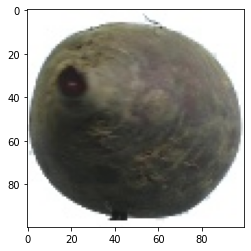

In [26]:
plt.imshow(data['datas'][390])
plt.show

In [27]:
np.unique(data['labels'])

array(['Apple Braeburn', 'Banana Red', 'Beetroot', 'Blueberry'],
      dtype='<U14')

In [28]:
clf = load('sgd_fruit.pickle')

In [29]:
class RGB2GrayTransformer(BaseEstimator, TransformerMixin):
    """
    Convert an array of RGB images to grayscale
    """
 
    def __init__(self):
        pass
 
    def fit(self, X, y=None):
        """returns itself"""
        return self
 
    def transform(self, X, y=None):
        """perform the transformation and return an array"""
        return np.array([skimage.color.rgb2gray(img) for img in X])
     
 
class HogTransformer(BaseEstimator, TransformerMixin):
    """
    Expects an array of 2d arrays (1 channel images)
    Calculates hog features for each img
    """
 
    def __init__(self, y=None, orientations=9,
                 pixels_per_cell=(8, 8),
                 cells_per_block=(3, 3), block_norm='L2-Hys'):
        self.y = y
        self.orientations = orientations
        self.pixels_per_cell = pixels_per_cell
        self.cells_per_block = cells_per_block
        self.block_norm = block_norm
 
    def fit(self, X, y=None):
        return self
 
    def transform(self, X, y=None):
 
        def local_hog(X):
            return hog(X,
                       orientations=self.orientations,
                       pixels_per_cell=self.pixels_per_cell,
                       cells_per_block=self.cells_per_block,
                       block_norm=self.block_norm)
 
        try: # parallel
            return np.array([local_hog(img) for img in X])
        except:
            return np.array([local_hog(img) for img in X])

In [30]:
x_train, x_test, y_train, y_test = train_test_split(np.array(data['datas']), np.array(data['labels']), test_size=0.2)

In [31]:
grayify = RGB2GrayTransformer()
hogify = HogTransformer(
    pixels_per_cell=(14, 14), 
    cells_per_block=(2,2), 
    orientations=9, 
    block_norm='L2-Hys'
)
scalify = StandardScaler()

In [40]:
x_test_gray = grayify.fit_transform(x_test)
x_test_hog = hogify.fit_transform(x_test_gray)
x_test_prepared = scalify.fit_transform(x_test_hog)

<function matplotlib.pyplot.show(close=None, block=None)>

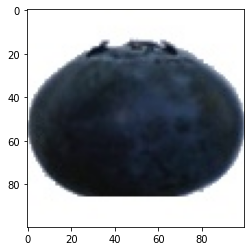

In [41]:
plt.imshow(x_test[0])
plt.show

In [36]:
len(x_test_prepared)

127

In [42]:
clf.predict([x_test_prepared[0]])

array(['Blueberry'], dtype='<U14')

In [44]:
x_test_prepared[0].shape

(1296,)

In [45]:
data['datas'][350].shape

(100, 100, 3)

<function matplotlib.pyplot.show(close=None, block=None)>

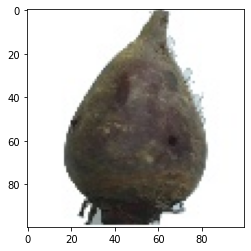

In [15]:
plt.imshow(data['datas'][350])
plt.show

In [38]:
x_test_gray1 = grayify.fit_transform([data['datas'][350]])
x_test_hog1 = hogify.fit_transform(x_test_gray1)
x_test_prepared1 = scalify.fit_transform(x_test_hog1)

In [51]:
x_test_prepared1[0].shape

(1296,)

In [39]:
len(x_test_prepared[0])

1296

In [49]:
clf.predict([x_test_prepared1[0]])

array(['Banana Red'], dtype='<U14')